In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
val_df = pd.read_csv('data/val.csv')

In [3]:
train_df

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [4]:
train_x = train_df.drop(columns = ['ID'])
train_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [5]:
val_x = val_df.drop(columns= ['ID'])
val_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,...,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,...,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0


In [34]:
Y_val = val_df[['Class']]
Y_val

,Class
0,0
1,0
2,0
3,0
4,0
...,...
28457,0
28458,0
28459,0
28460,0


In [6]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=50, max_samples = 50, contamination = float(0.005), max_features= 1.0, bootstrap= False, n_jobs = -1, random_state= None, verbose= 0)

# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출
clf.fit(train_x)
pred = clf.predict(train_x)
train_x['Class'] = pred
outliers = train_x.loc[train_x['Class'] == -1]
outlier_index = list(outliers.index)

print(train_x['Class'].value_counts()) 

 1    113272
-1       570
Name: Class, dtype: int64


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

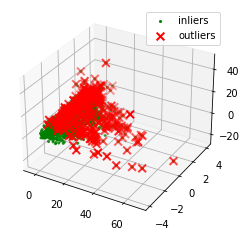

In [8]:
pca = PCA(n_components=3)
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(train_x)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
#Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs = X_reduce[:, 2], s = 4, lw = 1, label = "inliers", c = 'green')
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0], X_reduce[outlier_index, 1], X_reduce[outlier_index,2], lw = 2, s = 60, marker = 'x', c = 'red', label = 'outliers')
ax.legend()
plt.show()

In [9]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(train_x)
res = pd.DataFrame(pca.transform(train_x))
res

,0,1
0,4.504984,0.821287
1,0.596737,1.025487
2,-1.367510,0.840754
3,-0.857267,1.073616
4,0.062478,1.018401
...,...,...
113837,-1.272137,13.371490
113838,-0.506358,-1.974689
113839,-1.287112,0.480976
113840,-1.404256,0.120086


In [10]:
Z = np.array(res)
Z

array([[ 4.50498357,  0.82128713],
       [ 0.59673707,  1.02548735],
       [-1.36751043,  0.840754  ],
       ...,
       [-1.28711159,  0.48097591],
       [-1.40425592,  0.12008581],
       [-1.45752775, 12.58509181]])

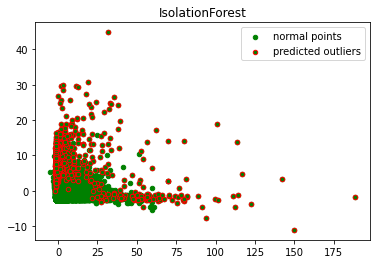

In [11]:
plt.title("IsolationForest")
#plt.contourf(Z, cmap = plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c = 'green', s = 20, label = "normal points")
b1 = plt.scatter(res.iloc[outlier_index, 0], res.iloc[outlier_index,1], c = 'green', s = 20, edgecolor = "red", label = "predicted outliers")
plt.legend(loc = "upper right")
plt.show()

전처리(표준화 작업)

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
target_x = val_x.drop(['Class'], axis = 1).values # 독립변인들의 value값 추출
target_y = val_x['Class'].values # 종속변인 추출

target_x = StandardScaler().fit_transform(target_x) # x객체에 x를 표준화한 데이터를 저장



features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30']
pd.DataFrame(target_x, columns = features).head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-0.177783,0.696237,0.695431,-0.159474,0.376991,-0.177243,0.554477,0.054839,-0.670890,-0.336130,...,-0.352327,-0.880277,-0.207943,-0.640623,-0.136693,0.193235,0.625880,0.273897,-0.352503,-1.996993
1,0.495973,0.203372,-0.115283,1.499744,0.849011,1.326248,0.087679,0.464405,-1.087624,0.670049,...,0.205443,0.556282,-0.085021,-2.276673,0.737451,0.411398,0.042845,-0.047128,-0.225563,-1.996825
2,0.590777,0.357005,0.128420,1.847750,-0.066092,-0.794541,0.451486,-0.227374,-0.817165,0.700989,...,0.015828,-0.167643,-0.132637,1.143898,1.199001,0.099468,-0.133608,0.054282,-0.225396,-1.996320
3,0.477619,-0.202906,0.257495,0.386148,0.187815,1.290898,-0.371751,0.549468,0.211934,-0.205798,...,-0.057825,0.108320,0.161788,-1.647833,0.157181,0.777498,0.092881,-0.018716,-0.177059,-1.996257
4,-1.559201,1.618597,0.988368,-1.722540,0.232409,-0.624400,1.767959,-1.665917,3.679938,5.581918,...,-1.216132,-0.252992,-0.280983,0.852936,0.254404,0.947893,-0.636024,-3.633134,-0.361769,-1.996088


PCA 실행

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printicipalComponenets = pca.fit_transform(target_x)
principalDF = pd.DataFrame(data = printicipalComponenets, columns = ['principal componenet1', 'principal component2']) 
# 주성분으로 이루어진 데이터 프레임 구성


In [16]:
principalDF.head()

,principal componenet1,principal component2
0,-0.348654,-1.842352
1,-0.239570,-2.374739
2,-0.204567,-1.874153
3,-0.130263,-2.476481
4,0.211537,-2.109441


In [17]:
pca.explained_variance_ratio_

array([0.06704045, 0.05659223])

In [18]:
sum(pca.explained_variance_ratio_)

0.12363267925155125

In [19]:
# 3개의 주성분으로 실행 해 보았으나 설명 가능한 분산량이 얼마 증가하지 않기 때문에 주성분은 2개로 결정하는것이 적절하다고 판단

# pca = PCA(n_components=3)

# printicipalComponenets = pca.fit_transform(target_x)

# principalDF = pd.DataFrame(data = printicipalComponenets, columns= ['principal componenet1', 'principal component2', '3'])

# pca.explained_variance_ratio_

두개의 주성분을 이용한 시각화

In [20]:
finalDf = pd.concat([principalDF, val_df[['Class']]], axis = 1)

In [21]:
finalDf['Class'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
28457    False
28458    False
28459    False
28460    False
28461    False
Name: Class, Length: 28462, dtype: bool

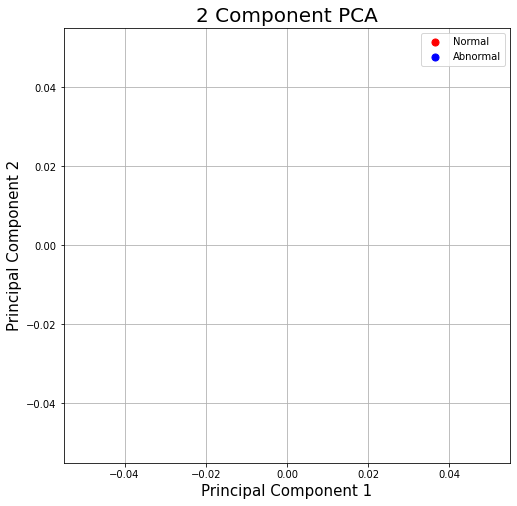

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Normal', 'Abnormal']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indiceToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indiceToKeep, 'principal componenet1'],
               finalDf.loc[indiceToKeep, 'principal component2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

Feature를 row방향으로 변환 시켜봄

In [35]:
val_xx = val_x.drop(columns= ['Class'])
val_xx

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,0.011106,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,-0.040513,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,...,0.228159,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622
28458,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,...,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693
28459,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763
28460,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928


In [36]:
X_val = StandardScaler().fit_transform(val_xx)

In [37]:
X_features = X_val.T

In [38]:
X_features

array([[-0.1777828 ,  0.49597343,  0.59077699, ..., -0.23408074,
         1.05386235, -0.12711389],
       [ 0.69623726,  0.20337215,  0.35700505, ...,  0.8100065 ,
        -0.1104227 ,  0.32922889],
       [ 0.69543061, -0.11528319,  0.12842026, ..., -0.11335212,
        -0.79897392,  0.4674842 ],
       ...,
       [ 0.27389654, -0.04712802,  0.05428168, ...,  0.75649878,
        -0.24584441,  0.34441467],
       [-0.35250264, -0.22556347, -0.2253965 , ..., -0.11532133,
        -0.3566769 , -0.32612133],
       [-1.99699312, -1.99682475, -1.99631967, ...,  1.63881874,
         1.63911338,  1.63919756]])

In [40]:
covariance_matrix = np.cov(X_features)
print(covariance_matrix)

[[ 1.00003514e+00 -3.84762444e-02 -1.47999659e-02  1.16774091e-02
  -2.57126465e-03  4.86537320e-03  1.35404651e-02 -4.42414861e-02
   3.84527895e-03  5.68852505e-03  1.15459922e-02 -1.07727850e-02
  -4.37466688e-04 -2.21973393e-02  4.64880395e-03  5.28813562e-03
  -2.89397711e-02 -1.59573570e-02  8.21934203e-03 -5.77452101e-02
  -1.08170043e-02 -1.49314629e-02 -6.40188077e-02  5.60831251e-03
  -1.60740340e-02  2.87119743e-04  6.76155009e-03  7.69716098e-02
  -2.17534801e-01  1.23901278e-01]
 [-3.84762444e-02  1.00003514e+00 -1.26229900e-02  1.63454723e-02
   2.03597876e-03  4.73918831e-03  1.89126764e-02  2.40119202e-02
   1.37428471e-02  1.98991110e-02 -6.83711171e-05  1.04691659e-02
   4.26197951e-03 -4.98571210e-03  1.01328756e-02  2.60753309e-02
   1.78089921e-02 -9.36540277e-03  1.96888046e-03 -7.52042452e-02
  -2.44944139e-02 -4.73121604e-03 -9.49737366e-02  2.92785949e-03
  -1.82426351e-02 -2.02615826e-03  5.05591181e-04  6.50336817e-02
  -5.51588367e-01 -1.27442643e-02]
 [-1.4

c_matrix를 이용해 EigenValue의 최대값인 EigenVector(PC)구하기

In [41]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [42]:
eig_vals

array([2.01130823, 0.03418428, 1.6990421 , 0.31653901, 0.67564154,
       0.80122876, 1.19406759, 0.86309652, 1.14184525, 0.90561321,
       1.10173745, 1.08695637, 0.93975604, 0.95794944, 0.96156838,
       1.06151953, 1.05455148, 1.05108202, 1.04748704, 1.03924806,
       1.03342721, 1.02708673, 0.98153735, 0.9855155 , 0.99029571,
       0.99672295, 1.00067937, 1.01923801, 1.01298177, 1.00914717])

In [43]:
eig_vecs

array([[ 1.53276070e-01, -1.79348099e-01,  1.19069581e-01,
         1.24127649e-01,  2.65705827e-01,  1.13850936e-02,
        -2.68910877e-01,  1.91514260e-01, -2.37751163e-01,
        -3.03148141e-01, -2.51993600e-01,  2.02520557e-01,
         5.81869457e-02, -5.41174526e-02, -2.91869915e-02,
        -1.94872609e-01,  2.66548645e-01, -2.87989356e-01,
         2.50289516e-01, -9.94535546e-02, -7.01303323e-02,
        -5.61909524e-02,  1.51547991e-02,  2.94849258e-01,
        -2.14637561e-01,  1.42099544e-01, -1.08683049e-01,
         1.46954818e-01, -5.98038639e-02,  1.09293030e-01],
       [ 3.96043755e-01, -4.05188605e-01, -5.68452285e-02,
        -1.16573213e-02,  2.02219200e-01, -1.36474981e-01,
        -3.40640788e-01,  3.80346568e-01,  2.01462943e-01,
         1.04041572e-01,  1.13546757e-01, -1.40811652e-01,
        -1.98963147e-01,  5.92814318e-02, -1.51309506e-01,
        -1.64449723e-02, -2.71945650e-01,  1.84937148e-01,
        -9.97201207e-02,  1.07509992e-01,  1.15481593e-

eig_vals의 최대값을 눈으로 확인후 가져오고, 전체 중 비율을 구한다.
 - 만약 하나의 eig_vecs만 사용한다면, 31 -> 1 차원으로 줄이면서
 - 전체 중 비율값이 = 전체정보 중 그만큼의 정보를 유실없이 가진다는 뜻이다.

In [44]:
eig_vals[0] / sum(eig_vals)

0.06704125214409395

In [45]:
projected_X = X_val.dot(eig_vecs.T[0])

In [46]:
projected_X

array([0.34663467, 0.2549519 , 0.20826883, ..., 0.25012767, 0.59635596,
       0.50453851])

In [47]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0 
result['Class'] = Y_val

In [48]:
result

,PC1,y-axis,Class
0,0.346635,0.0,0
1,0.254952,0.0,0
2,0.208269,0.0,0
3,0.145650,0.0,0
4,-0.209039,0.0,0
...,...,...,...
28457,0.407044,0.0,0
28458,0.066276,0.0,0
28459,0.250128,0.0,0
28460,0.596356,0.0,0


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

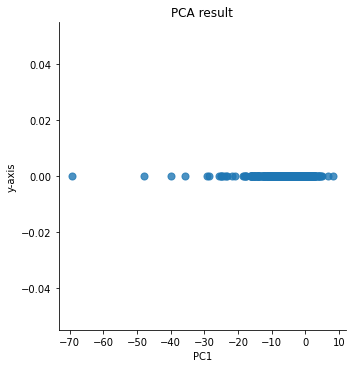

In [52]:
sns.lmplot('PC1', 'y-axis', data = result, fit_reg= False, scatter_kws={"s" : 50})
plt.title('PCA result')